<a href="https://colab.research.google.com/github/be-next/TP-IA/blob/main/TP_IA_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Normalisation

## Min Max Scaler


L'algorithme du Min-Max Scaler est relativement simple et est utilisé pour normaliser les données en machine learning. Il redimensionne les caractéristiques pour qu'elles se situent dans une plage spécifique, généralement [0, 1] ou [-1, 1].

$$
X_{\text{norm}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}}
$$

Où :

- $X_{\text{norm}}$ représente la valeur normalisée.
- $X$ est la valeur originale de la caractéristique.
- $X_{\text{min}}$ est la valeur minimale de la caractéristique dans le jeu de données.
- $X_{\text{max}}$ est la valeur maximale de la caractéristique dans le jeu de données.


Cette formule garantit que chaque caractéristique se retrouve redimensionnée dans la plage [0, 1]. Si une plage différente est souhaitée, comme [-1, 1], l'équation peut être ajustée en conséquence :

$$
X_{\text{norm}} = 2 \times \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}} - 1
$$




In [2]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [3]:
X = np.array([[70], [80], [120]])

In [4]:
scaler = MinMaxScaler()
scaler.fit_transform(X)

array([[0. ],
       [0.2],
       [1. ]])


$fit\_tranform(X_{train})$

$$
X_{train_{norm}} = \frac{X_{train} - X_{train_{ min}}}{X_{train_{max}} - X_{train_{min}}}
$$

$fit\_tranform(X_{test})$

$$
X_{test_{norm}} = \frac{X_{test} - X_{train_{ min}}}{X_{train_{max}} - X_{train_{min}}}
$$


In [5]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris = load_iris()

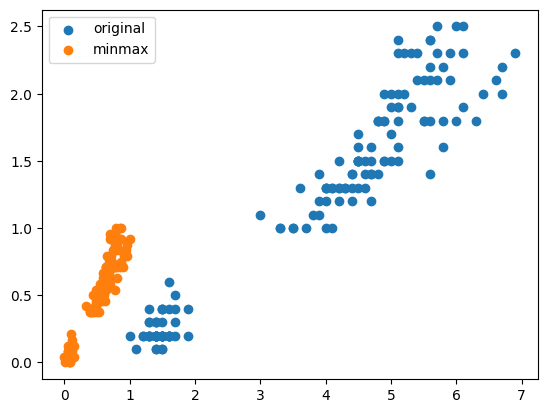

In [21]:
%matplotlib inline

X = iris.data

X_norm = MinMaxScaler().fit_transform(X)

plt.clf()

plt.scatter(X[:,2], X[:,3], label='original')
plt.scatter(X_norm[:,2], X_norm[:,3], label='minmax')
plt.legend()
plt.show()

## Standadisation


L'algorithme du Standard Scaler, également connu sous le nom de normalisation Z-score, est utilisé pour normaliser les caractéristiques en machine learning en les redimensionnant de manière à ce que leur moyenne soit égale à 0 et leur écart type égale à 1. Cela est réalisé en soustrayant la moyenne de chaque caractéristique et en divisant par l'écart type :

$$
X_{\text{norm}} = \frac{X - \mu}{\sigma}
$$

Où :

- $X_{\text{norm}}$ est la valeur normalisée.
- $X$ est la valeur originale de la caractéristique.
- $\mu$ est la moyenne de la caractéristique, $\mu = \frac{1}{N} \sum_{i=1}^{N} X_i$.
- $\sigma$ est l'écart type de la caractéristique, i.e $\sigma = \sqrt{\frac{1}{N} \sum_{i=1}^{N} (X_i - \mu)^2}$ (soit la racine de la variance).

Cette formule assure que chaque caractéristique a une moyenne de 0 et un écart type de 1 dans le jeu de données transformé.

In [7]:
from sklearn.preprocessing import StandardScaler

In [ ]:
!pip install ipympl

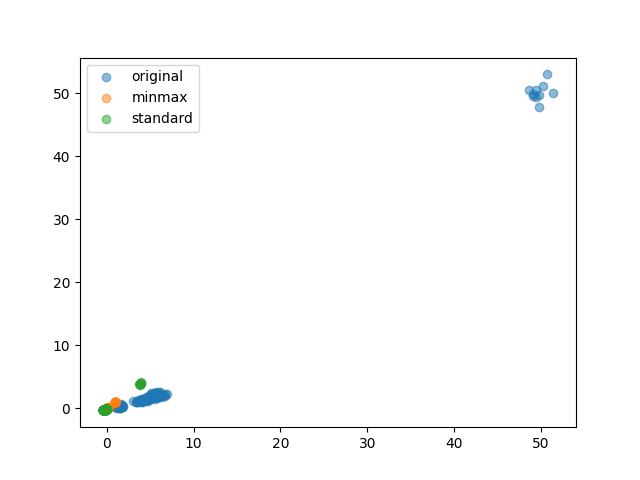

In [16]:
# TO SHOW INTERACTIVE PLOT
%matplotlib widget
from google.colab import output
output.enable_custom_widget_manager()

X_std = StandardScaler().fit_transform(X)

plt.clf()

plt.scatter(X[:,2], X[:,3], alpha=0.5, label='original')
plt.scatter(X_norm[:,2], X_norm[:,3], alpha=0.5, label='minmax')
plt.scatter(X_std[:,2], X_std[:,3], alpha=0.5, label='standard')
plt.legend()
plt.show()

## Point d'attention

Ces algorithme sont sensibles aux outlyers, i.e. aux données abérantes.

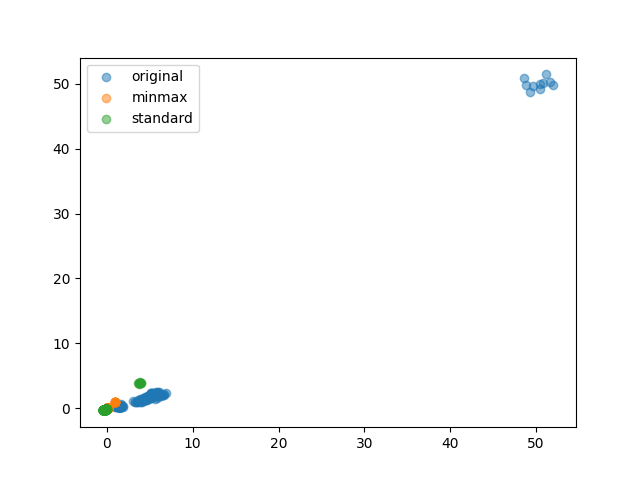

In [17]:


X = iris.data

# tableau de 10 lignes et 4 colonnes, où chaque cellule = 50 + rand
outliers = np.full((10, 4), 50) + np.random.randn(10, 4)
X = np.vstack((X, outliers))

X_norm = MinMaxScaler().fit_transform(X)
X_std = StandardScaler().fit_transform(X)

plt.clf()

plt.scatter(X[:,2], X[:,3], alpha=0.5, label='original')
plt.scatter(X_norm[:,2], X_norm[:,3], alpha=0.5, label='minmax')
plt.scatter(X_std[:,2], X_std[:,3], alpha=0.5, label='standard')
plt.legend()
plt.show()

## Robust Scaler

Le Robust Scaler est une méthode de mise à l'échelle des données qui est moins sensible aux valeurs aberrantes que des méthodes telles que le Min-Max Scaler ou le Standard Scaler. L'algorithme du Robust Scaler redimensionne les caractéristiques en utilisant les statistiques qui sont robustes aux valeurs aberrantes, en particulier la médiane et l'écart interquartile (IQR).

$$
X_{\text{norm}} = \frac{X - \text{Médiane}(X)}{\text{IQR}(X)}
$$

Où :

- $X_{\text{norm}}$ est la valeur normalisée.
- $X$ est la valeur originale de la caractéristique.
- $\text{Médiane}(X)$ est la médiane des valeurs de la caractéristique.
- $\text{IQR}(X)$ est l'écart interquartile des valeurs de la caractéristique, qui est la différence entre le 75e percentile et le 25e percentile.


In [12]:
from sklearn.preprocessing import RobustScaler

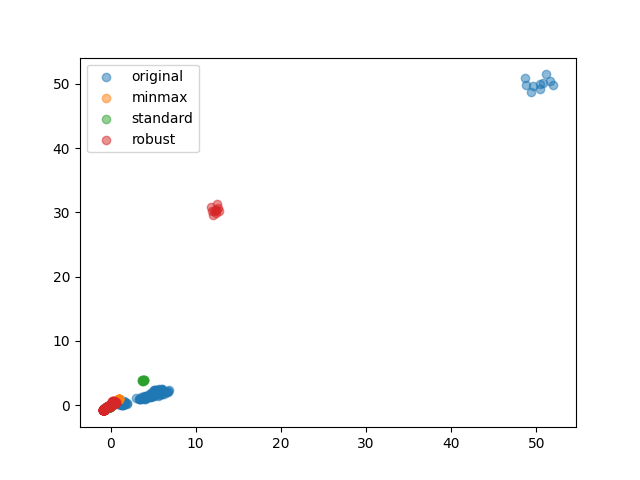

In [18]:
X_robust = RobustScaler().fit_transform(X)

plt.clf()

plt.scatter(X[:,2], X[:,3], alpha=0.5, label='original')
plt.scatter(X_norm[:,2], X_norm[:,3], alpha=0.5, label='minmax')
plt.scatter(X_std[:,2], X_std[:,3], alpha=0.5, label='standard')
plt.scatter(X_robust[:,2], X_robust[:,3], alpha=0.5, label='robust')
plt.legend()
plt.show()